In [1]:
import pandas as pd
import numpy as np
# from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier
from sklearn.metrics import recall_score, balanced_accuracy_score, f1_score, average_precision_score, precision_score, roc_auc_score, roc_curve, precision_recall_curve

from xgboost import XGBClassifier
from sklearn import svm, tree, ensemble, linear_model, naive_bayes

In [2]:
def classification_scores(model_name, y_true, y_pred):
    print("'Model': '{}', 'recall_score': {:.2f}, 'f1_score': {:.2f}, 'balanced_accuracy_score': {:.2f}, 'roc_auc_score': {:.2f}, 'average_precision_score': {:.2f}".format(model_name,\
        recall_score(y_true, y_pred), f1_score(y_true, y_pred), balanced_accuracy_score(y_true, y_pred),\
            roc_auc_score(y_true, y_pred), average_precision_score(y_true, y_pred)))

In [3]:
creditCard = pd.read_csv("Dataset/creditcard.csv")

In [4]:
creditCard.shape

(284807, 31)

In [5]:
#Basic Stats about the data
print("Number of rows and columns: ", creditCard.shape)
print("Column names: ", creditCard.columns)

Number of rows and columns:  (284807, 31)
Column names:  Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [6]:
print("Imbalance in the dataset: ")
print(creditCard["Class"].value_counts())

Imbalance in the dataset: 
Class
0    284315
1       492
Name: count, dtype: int64


In [7]:
# for col in creditCard.columns:
#   print("Column name: ", col)
#   print(creditCard[creditCard[col].isnull() == True].index)

In [8]:
# for col in creditCard.columns:
#   print("Column name: ", col)
#   print(creditCard[creditCard[col].isnull() == True])

creditCard.dropna(inplace=True)
print("Number of rows and columns: ", creditCard.shape)

Number of rows and columns:  (284807, 31)


In [9]:
# Data cleaning
#dropping time column
to_drop_cols = ["Time", "id"]
for drop_col in to_drop_cols:
    if drop_col in creditCard.columns:
        creditCard.drop(columns=[drop_col], inplace=True)
Y = creditCard["Class"]
creditCard.drop(columns=["Class"], inplace=True)

In [10]:
print("Number of rows and columns: ", creditCard.shape)

Number of rows and columns:  (284807, 29)


In [11]:
scaler = StandardScaler()
creditCard_normalized = scaler.fit_transform(creditCard)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(creditCard_normalized, Y, test_size=0.2, random_state=42, stratify=Y)

In [13]:
# Initialize LazyClassifier
clf = LazyClassifier(verbose=1, predictions=True, custom_metric=recall_score)

# Fit and predict using LazyClassifier
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Print the models and their performance
print(models)

  3%|▎         | 1/29 [00:44<20:34, 44.10s/it]

{'Model': 'AdaBoostClassifier', 'Accuracy': 0.9991222218320986, 'Balanced Accuracy': 0.8722291568568903, 'ROC AUC': 0.8722291568568903, 'F1 Score': 0.9991222218320986, 'recall_score': 0.7448979591836735, 'Time taken': 44.10074806213379}


  7%|▋         | 2/29 [02:15<32:15, 71.70s/it]

{'Model': 'BaggingClassifier', 'Accuracy': 0.9995786664794073, 'Balanced Accuracy': 0.9030172599428066, 'ROC AUC': 0.9030172599428067, 'F1 Score': 0.9995624872740402, 'recall_score': 0.8061224489795918, 'Time taken': 91.0232629776001}


 10%|█         | 3/29 [02:15<16:56, 39.08s/it]

{'Model': 'BernoulliNB', 'Accuracy': 0.9990519995786665, 'Balanced Accuracy': 0.8161682582430834, 'ROC AUC': 0.8161682582430834, 'F1 Score': 0.9990041419823578, 'recall_score': 0.6326530612244898, 'Time taken': 0.25871920585632324}


 17%|█▋        | 5/29 [02:17<06:16, 15.68s/it]

{'Model': 'CalibratedClassifierCV', 'Accuracy': 0.9991573329588147, 'Balanced Accuracy': 0.8162210156994706, 'ROC AUC': 0.8162210156994706, 'F1 Score': 0.9990986311301908, 'recall_score': 0.6326530612244898, 'Time taken': 2.038607120513916}


 24%|██▍       | 7/29 [02:33<03:55, 10.70s/it]

{'Model': 'DecisionTreeClassifier', 'Accuracy': 0.9991573329588147, 'Balanced Accuracy': 0.8773399905826146, 'ROC AUC': 0.8773399905826146, 'F1 Score': 0.9991573329588147, 'recall_score': 0.7551020408163265, 'Time taken': 16.09455418586731}
{'Model': 'DummyClassifier', 'Accuracy': 0.9982795547909132, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.9974200728063972, 'recall_score': 0.0, 'Time taken': 0.1618030071258545}


 28%|██▊       | 8/29 [02:34<02:34,  7.38s/it]

{'Model': 'ExtraTreeClassifier', 'Accuracy': 0.9992099996488887, 'Balanced Accuracy': 0.8824596172177368, 'ROC AUC': 0.8824596172177368, 'F1 Score': 0.999207977480133, 'recall_score': 0.7653061224489796, 'Time taken': 0.2637968063354492}


 31%|███       | 9/29 [02:45<02:55,  8.79s/it]

{'Model': 'ExtraTreesClassifier', 'Accuracy': 0.9996137776061234, 'Balanced Accuracy': 0.9132213415754598, 'ROC AUC': 0.9132213415754596, 'F1 Score': 0.9996012037715889, 'recall_score': 0.826530612244898, 'Time taken': 11.896306991577148}


 34%|███▍      | 10/29 [02:46<01:56,  6.14s/it]

{'Model': 'GaussianNB', 'Accuracy': 0.9763877672834521, 'Balanced Accuracy': 0.9117748182559462, 'ROC AUC': 0.9117748182559462, 'F1 Score': 0.9865243411115635, 'recall_score': 0.8469387755102041, 'Time taken': 0.21363425254821777}


 38%|███▊      | 11/29 [02:51<01:46,  5.93s/it]

{'Model': 'KNeighborsClassifier', 'Accuracy': 0.9995611109160493, 'Balanced Accuracy': 0.9030084670334088, 'ROC AUC': 0.9030084670334088, 'F1 Score': 0.9995455470408762, 'recall_score': 0.8061224489795918, 'Time taken': 5.45603609085083}


: 

In [2]:
# from sklearn.utils import all_estimators
# all_estimators(type_filter = "classifier")

In [27]:
#XGBoost
xgb = XGBClassifier(eval_metric = recall_score)
xgb = xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
classification_scores("xgboost-train", y_train, xgb.predict(X_train))
classification_scores("xgboost-test",y_test, y_pred)


-> performance on train dataset
'Model': 'xgboost', 'recall_score': 1.00, 'f1_score': 1.00, 'balanced_accuracy_score': 1.00, 'roc_auc_score': 1.00, 'average_precision_score': 1.00
-> performance on test dataset
'Model': 'xgboost', 'recall_score': 0.82, 'f1_score': 0.86, 'balanced_accuracy_score': 0.91, 'roc_auc_score': 0.91, 'average_precision_score': 0.75


In [28]:
#SVC
linear_svc = svm.LinearSVC()
linear_svc = linear_svc.fit(X_train, y_train)
classification_scores("LinearSVC-train", y_train, linear_svc.predict(X_train))
classification_scores("LinearSVC-test",y_test, linear_svc.predict(X_test))

'Model': 'LinearSVC-train', 'recall_score': 0.74, 'f1_score': 0.81, 'balanced_accuracy_score': 0.87, 'roc_auc_score': 0.87, 'average_precision_score': 0.66
'Model': 'LinearSVC-test', 'recall_score': 0.78, 'f1_score': 0.80, 'balanced_accuracy_score': 0.89, 'roc_auc_score': 0.89, 'average_precision_score': 0.64


In [29]:
svc = svm.SVC()
svc = svc.fit(X_train, y_train)
classification_scores("svc-train", y_train, svc.predict(X_train))
classification_scores("svc-test",y_test, svc.predict(X_test))

'Model': 'svc-train', 'recall_score': 0.81, 'f1_score': 0.89, 'balanced_accuracy_score': 0.90, 'roc_auc_score': 0.90, 'average_precision_score': 0.80
'Model': 'svc-test', 'recall_score': 0.67, 'f1_score': 0.79, 'balanced_accuracy_score': 0.84, 'roc_auc_score': 0.84, 'average_precision_score': 0.64


In [30]:
#RandomForest
rf = ensemble.RandomForestClassifier()
rf = rf.fit(X_train, y_train)
classification_scores("rf-train", y_train, rf.predict(X_train))
classification_scores("rf-test",y_test, rf.predict(X_test))

'Model': 'rf-train', 'recall_score': 1.00, 'f1_score': 1.00, 'balanced_accuracy_score': 1.00, 'roc_auc_score': 1.00, 'average_precision_score': 1.00
'Model': 'rf-test', 'recall_score': 0.81, 'f1_score': 0.86, 'balanced_accuracy_score': 0.90, 'roc_auc_score': 0.90, 'average_precision_score': 0.75


In [32]:
#Logistic Regression
logistic_regression = linear_model.LogisticRegression()
logistic_regression = logistic_regression.fit(X_train, y_train)
classification_scores("logistic_regression-train", y_train, logistic_regression.predict(X_train))
classification_scores("logistic_regression-test",y_test, logistic_regression.predict(X_test))

'Model': 'logistic_regression-train', 'recall_score': 0.64, 'f1_score': 0.75, 'balanced_accuracy_score': 0.82, 'roc_auc_score': 0.82, 'average_precision_score': 0.57
'Model': 'logistic_regression-test', 'recall_score': 0.65, 'f1_score': 0.73, 'balanced_accuracy_score': 0.83, 'roc_auc_score': 0.83, 'average_precision_score': 0.54


In [ ]:
# test_clf = XGBClassifier()
# print(test_clf.get_params())
# help(test_clf)

In [37]:
#GradientBoosting
gbc = ensemble.GradientBoostingClassifier(max_depth=15, verbose=1)
gbc = gbc.fit(X_train, y_train)
classification_scores("GradientBoosting-train", y_train, gbc.predict(X_train))
classification_scores("GradientBoosting-test",y_test, gbc.predict(X_test))

      Iter       Train Loss   Remaining Time 
         1           0.0056           18.67m
         2           0.0036           18.08m
         3           0.0029           17.73m
         4           0.0027           17.64m
         5           0.0025           18.08m
         6           0.0023           17.92m
         7           0.0021           17.67m
         8           0.0019           17.49m
         9           0.0018           17.25m
        10           0.0016           17.02m
        11           0.0015           16.80m
        12           0.0014           16.59m
        13           0.0013           16.39m
        14           0.0012           16.19m
        15           0.0011           15.98m
        16           0.0010           15.79m
        17           0.0010           15.59m
        18           0.0009           15.40m
        19           0.0009           15.22m
        20           0.0008           15.03m
        21           0.0008           14.84m
        2

In [40]:
#VotingClassifier
#classifiers
clf1 = XGBClassifier(eval_metric = recall_score)
clf2 = ensemble.RandomForestClassifier()
clf3 = naive_bayes.GaussianNB()
voting_classifier = ensemble.VotingClassifier(estimators=[
    ('xgb', clf1), ('random_forest', clf2), ('naive_bayes', clf3)], verbose=2, n_jobs = -1)
voting_classifier = voting_classifier.fit(X_train, y_train)
classification_scores("voting_classifier-train", y_train, voting_classifier.predict(X_train))
classification_scores("voting_classifier-test",y_test, voting_classifier.predict(X_test))

[Voting] .............. (3 of 3) Processing naive_bayes, total=   0.2s
[Voting] ...................... (1 of 3) Processing xgb, total=  51.3s
[Voting] ............ (2 of 3) Processing random_forest, total= 2.7min
'Model': 'voting_classifier-train', 'recall_score': 1.00, 'f1_score': 1.00, 'balanced_accuracy_score': 1.00, 'roc_auc_score': 1.00, 'average_precision_score': 1.00
'Model': 'voting_classifier-test', 'recall_score': 0.83, 'f1_score': 0.88, 'balanced_accuracy_score': 0.91, 'roc_auc_score': 0.91, 'average_precision_score': 0.77


In [46]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
tsne = TSNE()
tsne_transformed = tsne.fit_transform(creditCard_normalized)

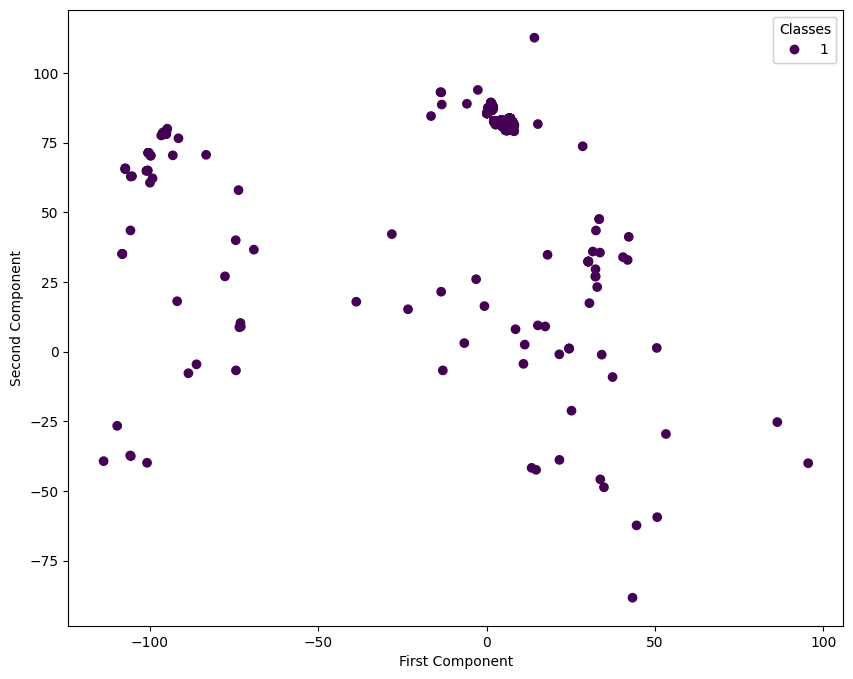

In [49]:
fig, ax = plt.subplots(1,1,figsize=(10,8))
scatter = ax.scatter(tsne_transformed[Y.values == 1,0],tsne_transformed[Y.values == 1,1],c = Y[Y.values == 1])
legend1 = ax.legend(*scatter.legend_elements(num=4),
                    loc="best", title="Classes")
ax.add_artist(legend1)
ax.set_xlabel('First Component')
ax.set_ylabel('Second Component')
plt.show()

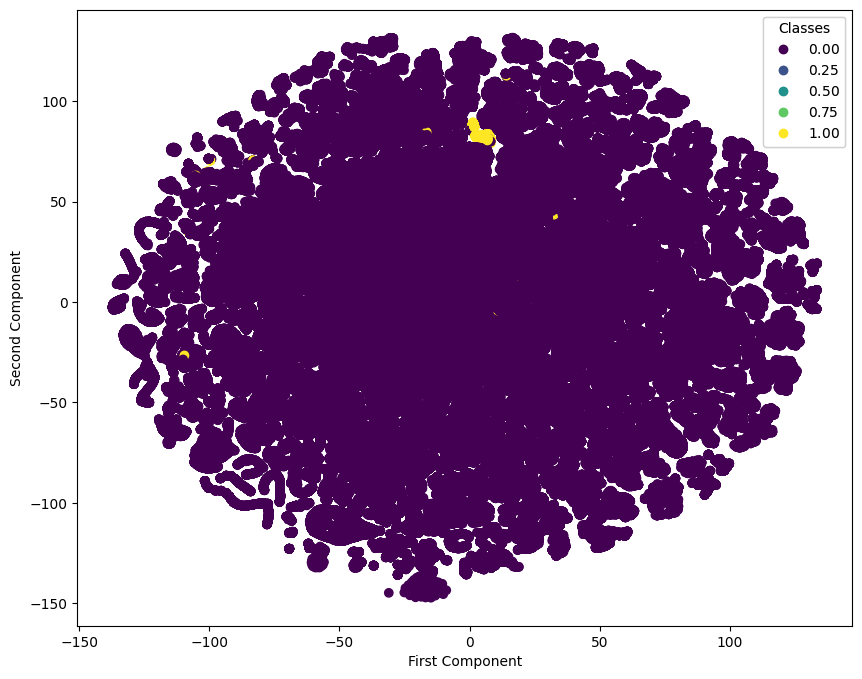

In [54]:
fig, ax = plt.subplots(1,1,figsize=(10,8))
scatter = ax.scatter(tsne_transformed[:,0],tsne_transformed[:,1],c = Y.values)
legend1 = ax.legend(*scatter.legend_elements(num=4),
                    loc="best", title="Classes")
ax.add_artist(legend1)
ax.set_xlabel('First Component')
ax.set_ylabel('Second Component')
plt.show()

In [52]:
tsne2 = TSNE()
tsne_transformed_2 = tsne2.fit_transform(creditCard)

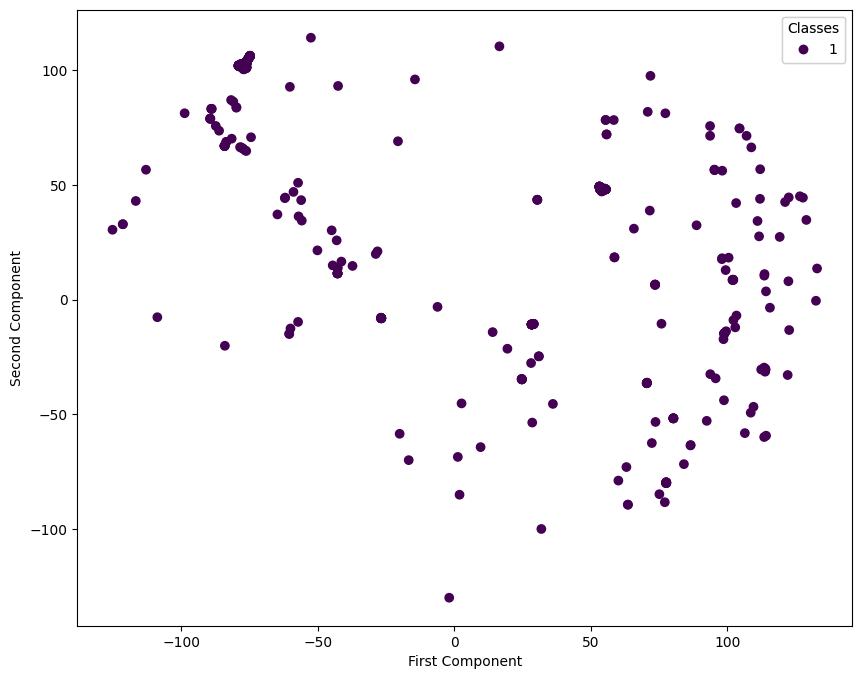

In [53]:
fig, ax = plt.subplots(1,1,figsize=(10,8))
scatter = ax.scatter(tsne_transformed_2[Y.values == 1,0],tsne_transformed_2[Y.values == 1,1],c = Y[Y.values == 1])
legend1 = ax.legend(*scatter.legend_elements(num=4),
                    loc="best", title="Classes")
ax.add_artist(legend1)
ax.set_xlabel('First Component')
ax.set_ylabel('Second Component')
plt.show()

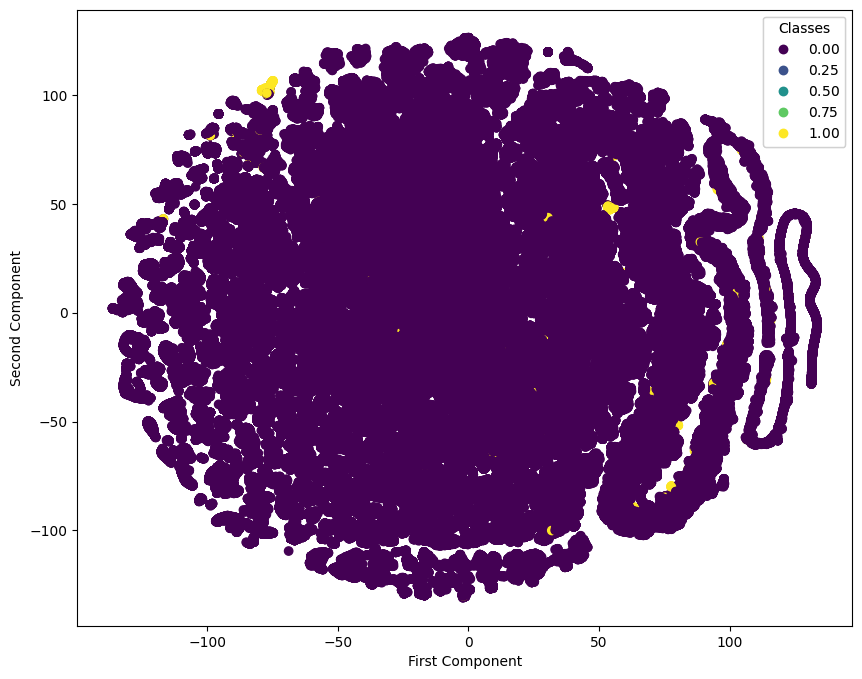

In [55]:
fig, ax = plt.subplots(1,1,figsize=(10,8))
scatter = ax.scatter(tsne_transformed_2[:,0],tsne_transformed_2[:,1],c = Y.values)
legend1 = ax.legend(*scatter.legend_elements(num=4),
                    loc="best", title="Classes")
ax.add_artist(legend1)
ax.set_xlabel('First Component')
ax.set_ylabel('Second Component')
plt.show()

In [ ]:
python3 train_ml_model.py --data_path "/Users/amankumar/Work/ECE_750/Project/Dataset/creditcard_2023.csv" --to_save_path "/Users/amankumar/Work/ECE_750/Project/models"